In [2]:
import torch
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *

A的第二大特征值: 1.0
A的beta: 0.9669603011709537
A的spectral gap: 0.03303969882904634
A的kappa: 4.000000000000041
S_A是: 288.9002558367181 

B的第二大特征值: 0.9144567488150303
B的beta: 0.9691028019834413
B的spectral gap: 0.030897198016558658
B的kappa: 1.265131362446171
S_B是: 159.90782852957562 



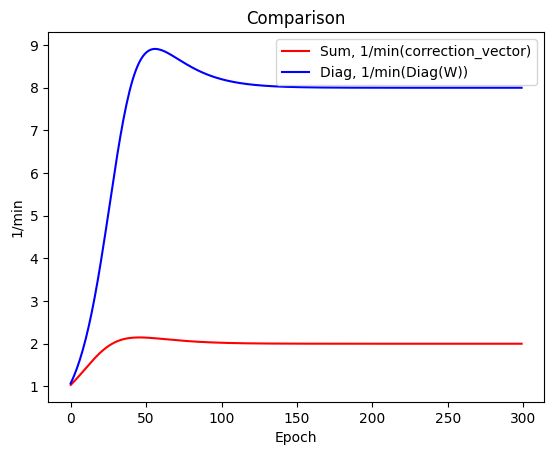

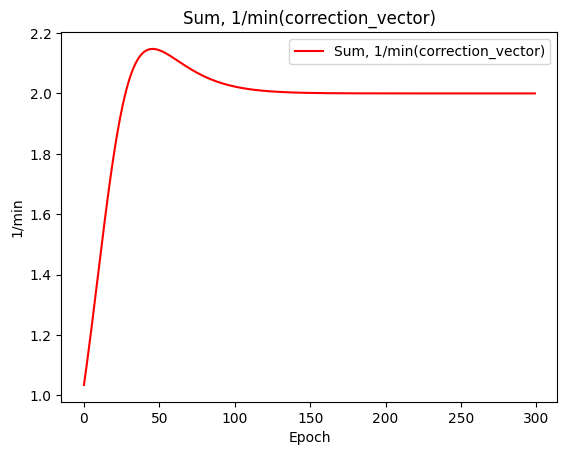

In [10]:
n=4
d=784
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A=get_xinmeng_matrix(n=n).T 
a=0.1
A=a*A+(1-a)*I
B=get_B(A=A,u=2*n,n=n)
show_row(A)
show_col(B)
epochs=300
test_row(A=A,epochs=epochs)

Training Progress: 100%|██████████| 200/200 [00:19<00:00, 10.08it/s, accuracy=97.4674384949%, epoch=200, loss=0.0779157411]


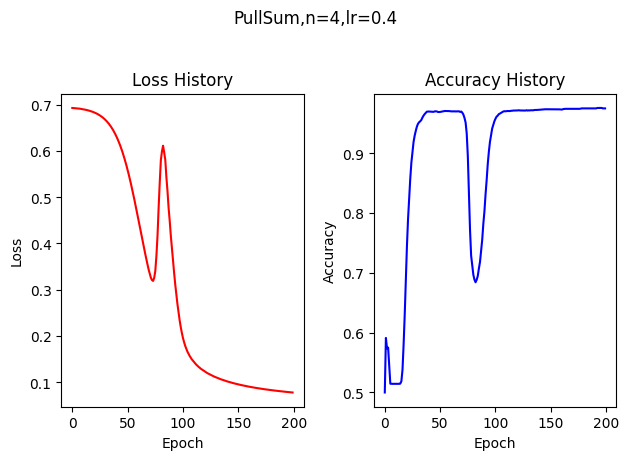

In [16]:
l1,a1=train_PullSum(n=n,d=d,A=A,B=B,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.4/n)) 

Training Progress: 100%|██████████| 200/200 [00:16<00:00, 12.41it/s, accuracy=97.3950795948%, epoch=200, loss=0.0932986625]


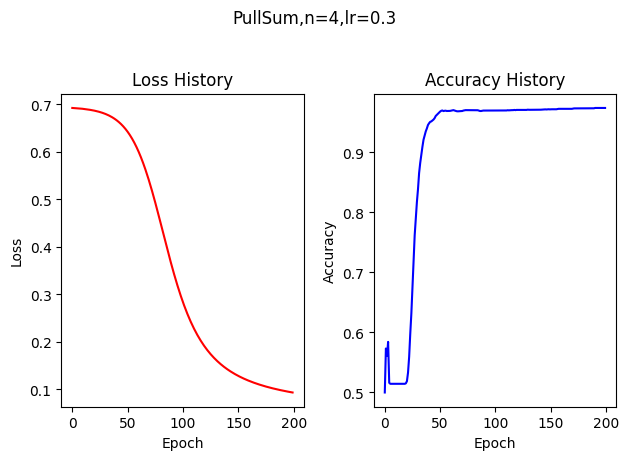

In [17]:
l2,a2=train_PullSum(n=n,d=d,A=A,B=B,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.3/n)) 

Training Progress: 100%|██████████| 200/200 [00:19<00:00, 10.10it/s, accuracy=97.4674384949%, epoch=200, loss=0.0782861486]


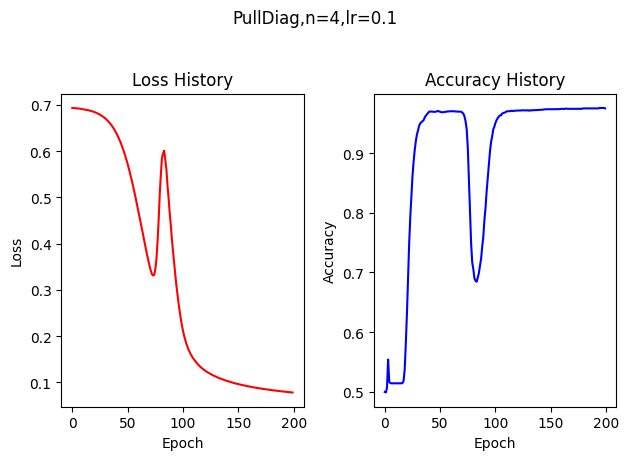

In [22]:
L1,A1=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=0.1) 

Training Progress:   0%|          | 0/200 [00:00<?, ?it/s, accuracy=50.0000000000%, epoch=1, loss=0.6930222809]

Training Progress: 100%|██████████| 200/200 [00:15<00:00, 12.52it/s, accuracy=97.3950795948%, epoch=200, loss=0.0939443000]


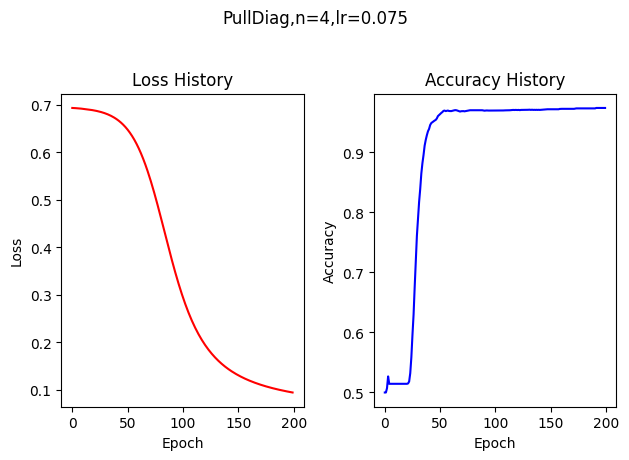

In [23]:
L2,A2=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.3/4))

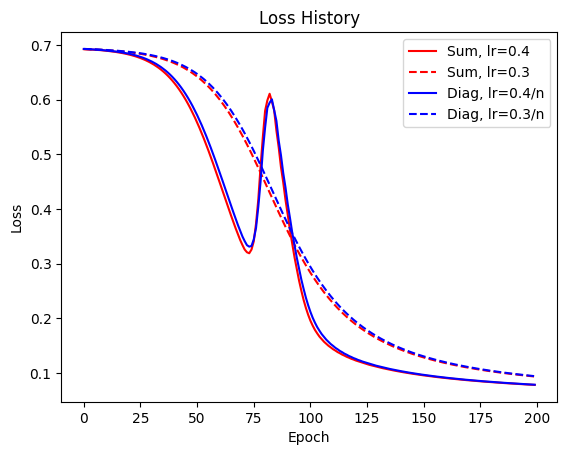

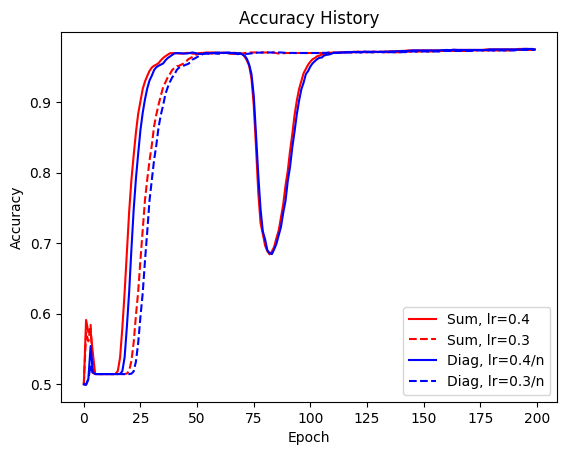

In [26]:
plt.plot(l1,color='r',linestyle='-',label='Sum, lr=0.4')
plt.plot(l2,color='r',linestyle='--',label='Sum, lr=0.3')
plt.plot(L1,color='b',linestyle='-',label='Diag, lr=0.4/n')
plt.plot(L2,color='b',linestyle='--',label='Diag, lr=0.3/n')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend() 
plt.show()

plt.plot(a1,color='r',linestyle='-',label='Sum, lr=0.4')
plt.plot(a2,color='r',linestyle='--',label='Sum, lr=0.3')
plt.plot(A1,color='b',linestyle='-',label='Diag, lr=0.4/n')
plt.plot(A2,color='b',linestyle='--',label='Diag, lr=0.3/n')
plt.title('Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend() 
plt.show()

换成get_xinmeng_like_matrix, 更稀疏

现在的目的是想要Sum比Diag好，一般来说，我们已经知道，Sum可以耐受更大的学习率，但学习率为lr的Diag不一定比学习率为n*lr的Sum跑的更慢

A的第二大特征值: 0.24828766995336896
A的beta: 0.8691384281849752
A的spectral gap: 0.13086157181502478
A的kappa: 27.568731392881997
S_A是: 174.54883749264928 

B的第二大特征值: 0.2483579941033657
B的beta: 0.8691347171295489
B的spectral gap: 0.13086528287045107
B的kappa: 27.501536095364038
S_B是: 174.4452128166463 



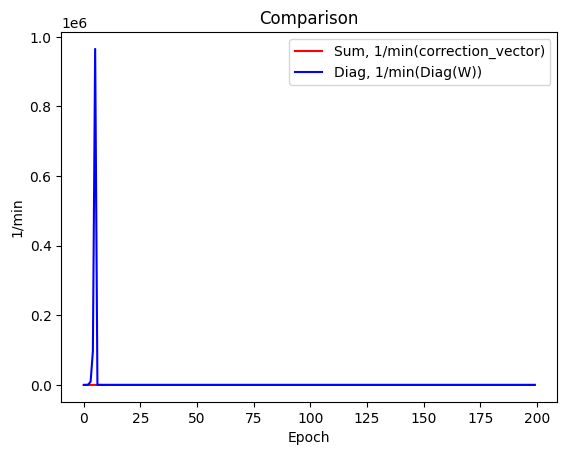

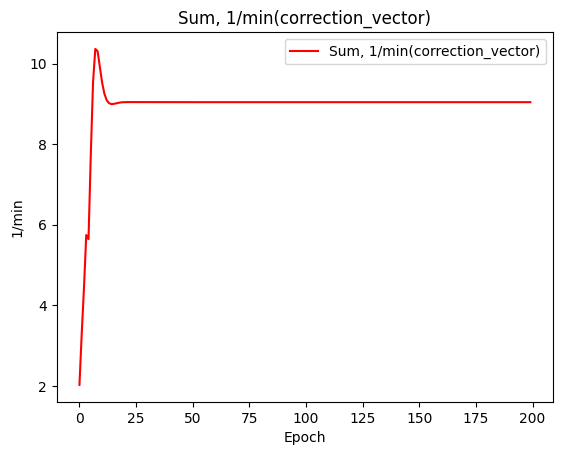

10.366672903832239   965172.6010041076


In [40]:
n=7
d=784
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A=get_xinmeng_like_matrix(n,seed=8026).T #92,241,3287,8026
A=0.9*A+0.1*I
B=get_B(A=A,u=2*n,n=n)
show_row(A)
show_col(B)
epochs=200
_,__=test_row(A=A,epochs=epochs,if_plot=True)
print(_,' ',__)

In [11]:
index,value=0,20
for i in range(3000):
    A=get_xinmeng_like_matrix(n,seed=i).T
    epochs=500
    _,__=test_row(A=A,epochs=epochs,if_plot=False)
    if _ < value:
        index,value=i,_
print(index,value)

2314 1.6290092457844534


In [39]:
index,value=0,10
for i in tqdm(range(5000,10000), desc="Training Progress"):
    A=get_xinmeng_like_matrix(n,seed=i).T
    epochs=500
    _,__=test_row(A=A,epochs=epochs,if_plot=False)
    if __ > value and _ < 25:
        index,value=i,__
print(index,value)

Training Progress: 100%|██████████| 5000/5000 [00:18<00:00, 267.94it/s]

8026 1.2276834410798737e+19


Training Progress: 100%|██████████| 200/200 [00:28<00:00,  6.92it/s, accuracy=89.3012197643%, epoch=200, loss=0.6038281407]


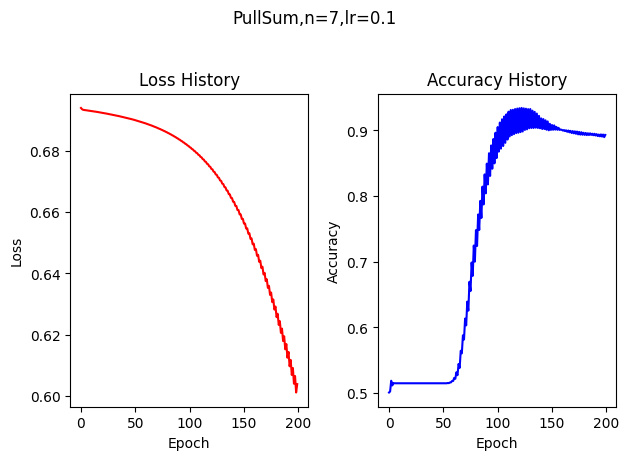

In [36]:
l1,a1=train_PullSum(n=n,d=d,A=A,B=B,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.1/n)) 

In [ ]:
L1,A1=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=0.1/n) 

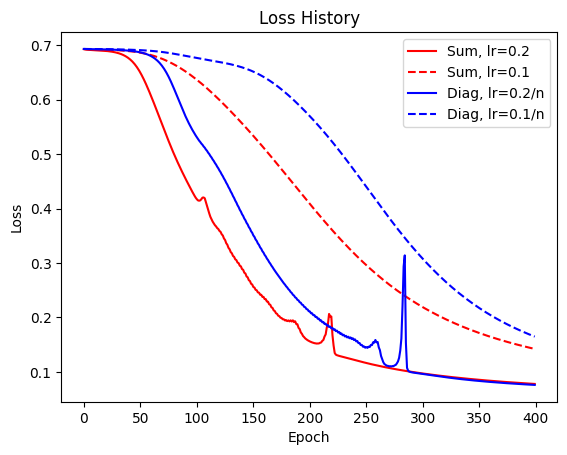

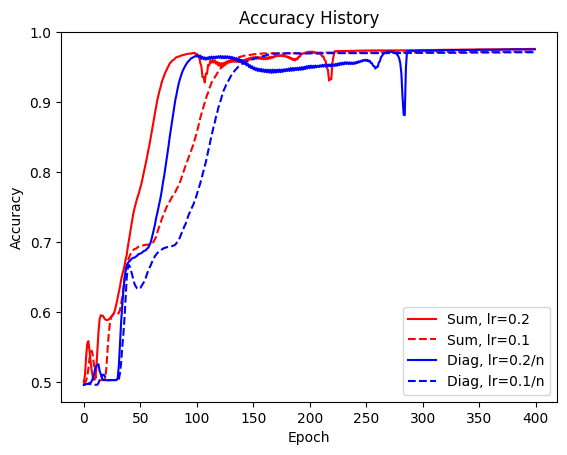

In [48]:
plt.plot(l1,color='r',linestyle='-',label='Sum, lr=0.2')
plt.plot(L1,color='b',linestyle='-',label='Diag, lr=0.2/n')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend() 
plt.show()

plt.plot(a1,color='r',linestyle='-',label='Sum, lr=0.2')
plt.plot(A1,color='b',linestyle='-',label='Diag, lr=0.2/n')
plt.title('Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend() 
plt.show()